# Welcome to QuCAT!

## Description

With the increased developments in quantum computing, the availability of systematic and automatic testing approaches for quantum programs is becoming more and more essential. Here we introduce the quantum software testing tool QuCAT for combinatorial testing of quantum programs. QuCAT provides two functionalities of use. With the first functionality, the tool generates a test suite of a given strength (e.g., pair-wise). With the second functionality, it generates test suites with increasing strength until a failure is triggered or a maximum strength is reached. QuCAT uses two test oracles to check the correctness of test outputs, which is Unexpected Output Failure (uof) and Wrong Output Distribution Failure (wodf).

### Test oracles

- uof:  the output returned by the program for a given input is not allowed by the program specification;
- wodf: the output values returned by multiple executions for a given input follow a probability distribution significantly different from the one specified by the program specification.

### Two functioinalities
- Functionality One: the user specifies a strength k, and generates a test suite Tk for that strength. They can then assess the passing and failing of tests.
- Functionality Two: QuCAT keeps on generating test suites of incremental strength, till a failure is detected, or a maximum k is reached.

## How to use QuCAT
Please prepare the **quantum program file** and the **configuration file**, then input them into the QuCAT tool. Here we introduce the example algorithm *QRAM*, and the introduce the structure of the two input files.

### Example Algorithm QRAM.

Let's take **QRAM** algorithm as an example! This algorithm uses quantum computing principles to store and modify quantum or classical data efficiently.

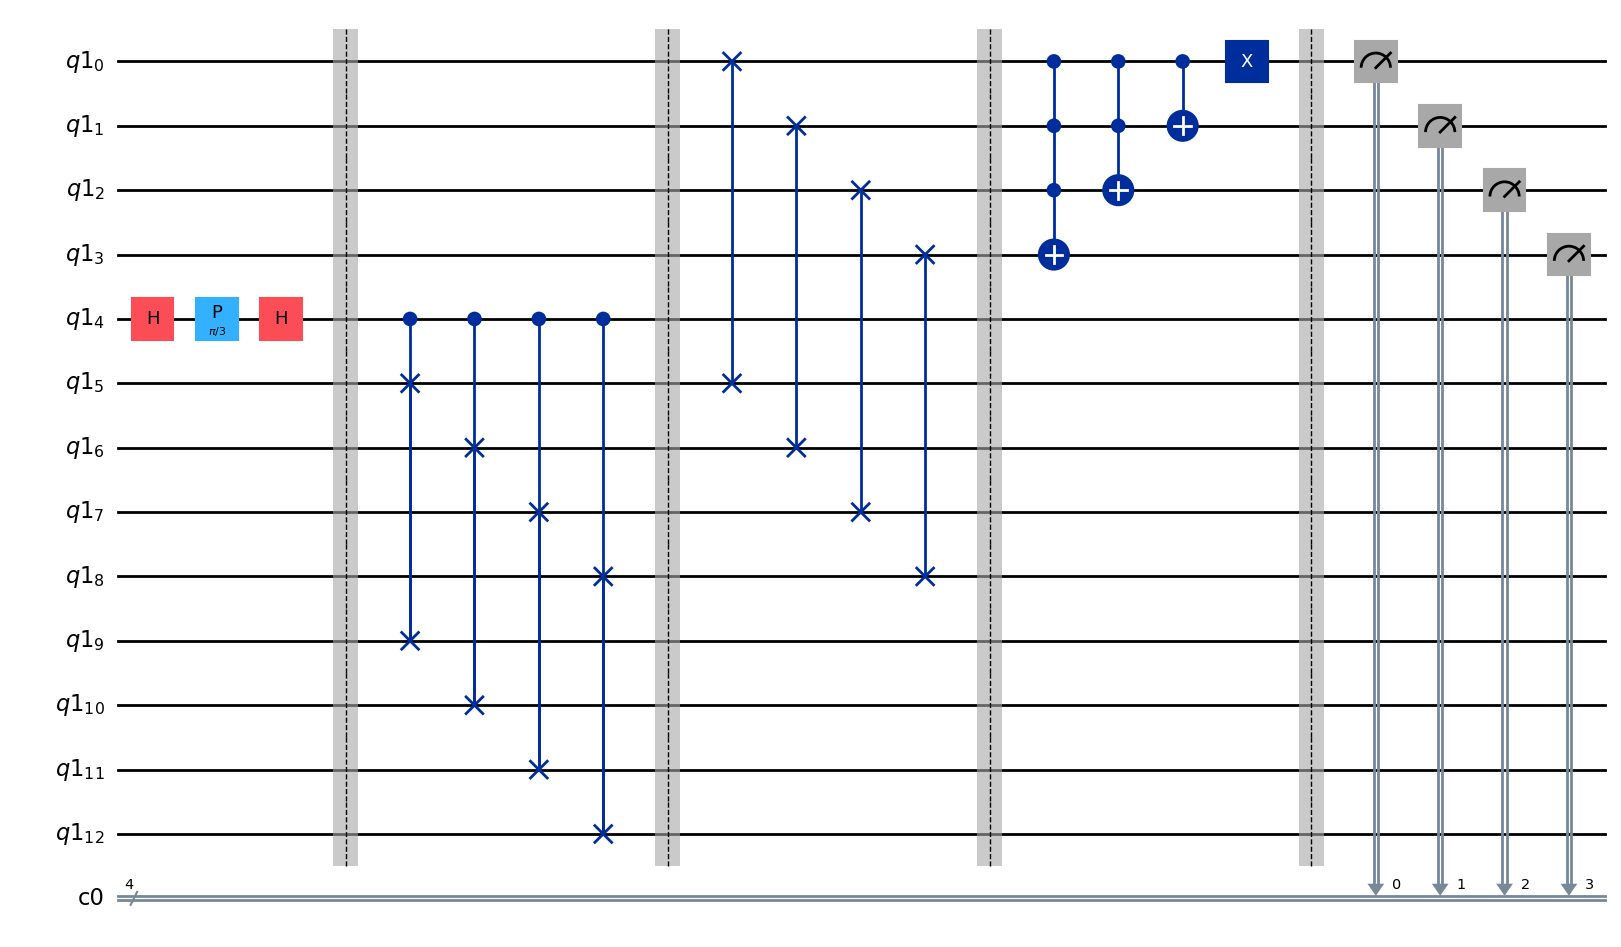

In [1]:
import math

from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

q = QuantumRegister(13)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)
qc.h(4)
qc.p(math.pi / 3, 4)
qc.h(4)

qc.barrier()

qc.cswap(4, 5, 9)
qc.cswap(4, 6, 10)
qc.cswap(4, 7, 11)
qc.cswap(4, 8, 12)

qc.barrier()

qc.swap(0, 5)
qc.swap(1, 6)
qc.swap(2, 7)
qc.swap(3, 8)

qc.barrier()

qc.mcx([0, 1, 2], 3)
qc.mcx([0, 1], 2)
qc.cx(0, 1)
qc.x(0)

qc.barrier()

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

qc.draw(output="mpl")

In [3]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

{'0001': 1024}

### Quantum Program File
Here we show the structure of this input file:
- The quantum program should be written with Qiskit in Python.
- The code has to be structured in a function named as 'run' with one parameter that refers to the quantum circuit.
- Users only need to add gates to the circuit and measure output qubits to get the output. They don't need to set any register, initialize circuits, choose the simulation, or execute the circuits in 'run' function.

### Example Quantum Program File
Here is the corresponding quantum program file of *QRAM.py* for Quito.

In [3]:
import math


def run(qc):
    qc.h(4)
    qc.p(math.pi / 3, 4)
    qc.mcx([5, 7, 9, 11], 12)  # M3
    qc.h(4)

    qc.barrier()

    qc.cswap(4, 5, 9)
    qc.cswap(4, 6, 10)
    qc.cswap(4, 7, 11)
    qc.cswap(4, 8, 12)

    qc.barrier()

    qc.swap(0, 5)
    qc.swap(1, 6)
    qc.swap(2, 7)
    qc.swap(3, 8)

    qc.barrier()

    qc.mcx([0, 1, 2], 3)
    qc.mcx([0, 1], 2)
    qc.cx(0, 1)
    qc.x(0)

    qc.barrier()

    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

### Configuration File
Here we show the structure of this the program configuration file. It is an INI file, which contains three sections defined by headers enclosed in brackets [ ] and contains several properties represented by key-value pairs, called properties. This configuration file describes the program information, QuCAT execution information and program specification of the algorithm under test. Some properties are required and some properties are optional.

Here is the corresponding configuration file for **QRAM** algorithm. (The complete version can be found in [this repo](https://github.com/Simula-COMPLEX/qucat-tool/tree/main))

### Test with QuCAT Directly

Import qucat and use qucat method directly. It contains three parameters: functionality choice (1 or 2), absolute path of the configuration file and the seed file.

In [10]:
from qucat_cover.qucat_run import qucat

qucat(1, "qram_sample.ini", "QR_seed.txt")

We can check the process bar to see whether quito is running. After the whole process is finished, you can find the result file in a folder named **"result"**, which is located in the same directory of the **quantum program file**.

### Submit with by Slurm Job

Please first create an **executing file** and a **slurm file** to run the experiment.

Here is the executing file *quito_test.py*.

In [ ]:
import time

from qucat_cover.qucat_run import qucat

start = time.time()
i = 0
qucat(1, "qram_sample.ini", "QR_seed.txt")
end = time.time()

print(end - start)

Here is the slurm file. It shows the configuration of running on a CPU node.

The following is the version of configuration file running on a GPU node.

Please prepare the following files before submitting to the eX3.

- quantum program file
- configuration file
- executing file
- slurm file

Run the following code to submit the job.

In [9]:
import os

command = "sbatch /home/user/qucat.slurm"
os.system(command)

Submitted batch job 293033


0

It will print the job number after a successful submission. You can check the running statu by using the "squeue" command. After completing the execution, you can check the file *slurm-[job number].out* to check the the execution time. Result files can be found in the same 